## Importing packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Downloading data

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-04-07 08:17:06--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

100%[======================================>] 72,629      --.-K/s   in 0.1s    

2020-04-07 08:17:06 (474 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



## Reading data

In [3]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.4+ KB


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


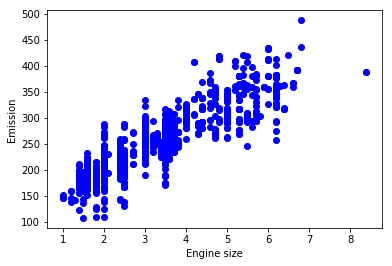

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [7]:
msk = np.random.rand (len (df)) < 0.8

In [8]:
train = cdf[msk]
test = cdf[~msk]

## Polynomial regression

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [11]:
x_train = np.asanyarray (train [['ENGINESIZE']])
y_train = np.asanyarray (train [['CO2EMISSIONS']])

In [12]:
x_test = np.asanyarray (test [['ENGINESIZE']])
y_test = np.asanyarray (test [['CO2EMISSIONS']])

In [13]:
poly = PolynomialFeatures (degree = 2)

In [15]:
poly_x_train = poly.fit_transform (x_train)

In [17]:
poly_x_train.size

2541

In [18]:
regr = linear_model.LinearRegression ()

In [20]:
regr.fit (poly_x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
regr.coef_[0]

array([ 0.        , 50.44663444, -1.495754  ])

In [25]:
regr.intercept_ [0]

106.88383229302019

In [31]:
poly_x_test = poly.fit_transform (x_test)

In [32]:
y_hat = regr.predict (poly_x_test)

In [33]:
from sklearn.metrics import r2_score

In [36]:
round (regr.score (poly_x_test, y_test),2)

0.79

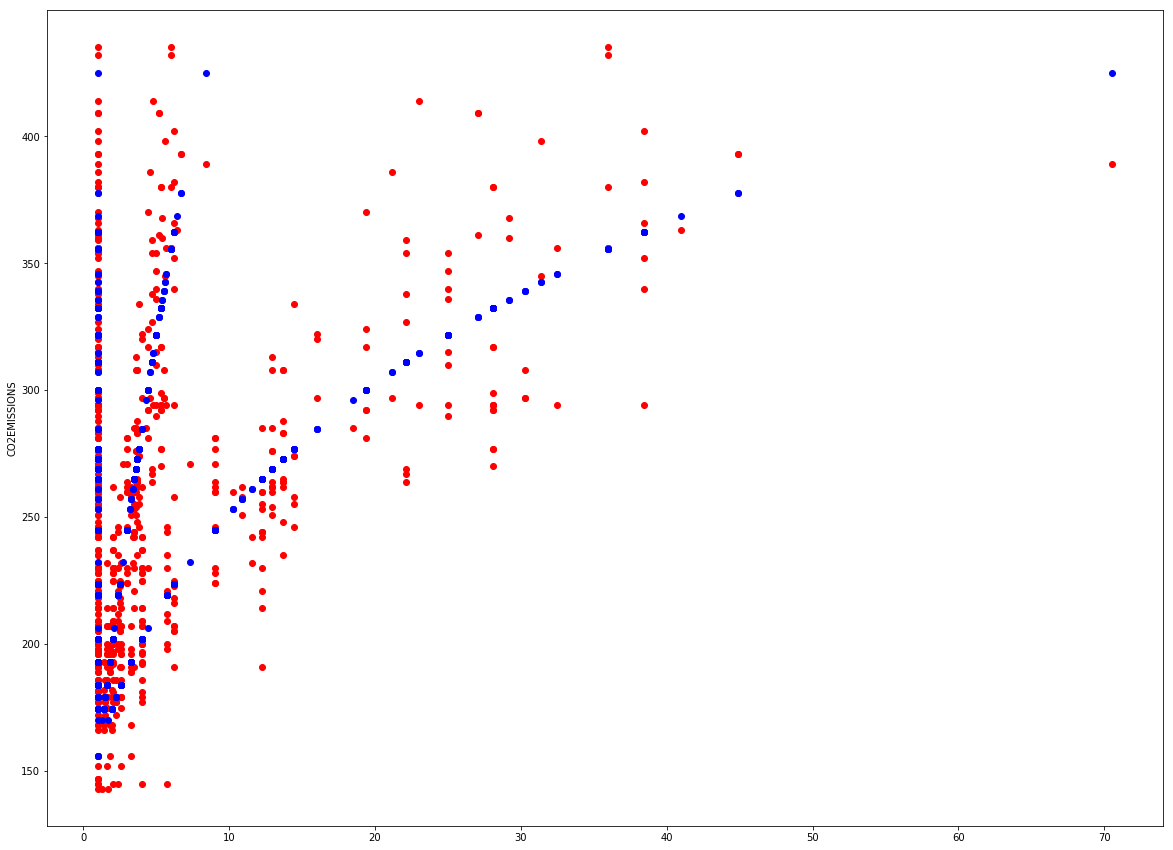

In [47]:
plt.figure (figsize = (20,15))
plt.plot (poly_x_test, y_test, 'ro')
plt.plot (poly_x_test, y_hat, 'bo')
plt.ylabel ('CO2EMISSIONS')
plt.show ()

In [44]:
RMSE = round (np.sqrt (np.mean ((y_hat-y_test)**2)),2)

In [46]:
print ('The root mean square error is {}'.format(RMSE))

The root mean square error is 29.57
